In [ ]:
import random
from typing import List, Callable
import matplotlib.pyplot as plt
import os

In [ ]:
Genome = List[float] # A genome is a list of floats(typically represents a solution so each float in the list could represent a parameter of the solution)
Population = List[Genome] # A population/generation is a list of genomes(for evolve over generations)
Fitness = Callable[[Genome, Callable], float]  # Fitness function as an object - takes a Genome and benchmark function as input, outputs a float.
Function = Callable[[float, float], float]  # Benchmark function as an object, takes two floats (x, y) as input and outputs a float.
def booth_function(x: float, y: float) -> float:
    # Booth function https://www.sfu.ca/~ssurjano/booth.html
    return (x + 2 * y - 7) ** 2 + (2*x + y-5)**2

def three_hump_camel(x: float, y: float) -> float:
    # Three-Hump Camel function https://www.sfu.ca/~ssurjano/camel3.html
    return (2 * x**2 - 1.05 * x**4 + (x**6) / 6) + (x * y) + y**2

def sum_diff_powers(x: float, y: float) -> float:
    # 2D Sum of Different Powers function: https://www.sfu.ca/~ssurjano/sumpow.html
    return x**2 + y**3

def sphere_function(x: float, y: float) -> float:
    # 2D sphere function: https://www.sfu.ca/~ssurjano/spheref.html
    return x**2 + y**2


def beale_function(x: float, y: float) -> float:
    # Beale function https://www.sfu.ca/~ssurjano/beale.html
    term1 = 1.5 - x + x * y
    term2 = 2.25 - x + x * y**2
    term3 = 2.625 - x + x * y**3
    return term1**2 + term2**2 + term3**2

In [ ]:
# The following Fitness function can work with any optimisation test problem where the solution we want is at f(x) = 0
def fitness(genome: Genome, function: Function) -> float:
    #Determine how much a solution is good for our problem using a specific function
    x, y = genome
    ans = function(x, y)  # Call the passed function
    if ans == 0:
        return float('inf')  # If the result is 0, return infinity (unacceptable solution)
    # The closer the value is to 0, the larger the fitness is (absolute value of the inverse of our answer)
    return abs(1 / ans)


    #//////////////#
def generate_genome() -> Genome:# function return value of type genome (output will be a list containing floating-point numbers)
    # Generates a random genome with two values from 0 to 10,000
    genome = [random.uniform(0, 10000) for _ in range(2)]#loop runs two times to generate two values.
    return genome
    #//////////////#


def generate_population(k: int) -> Population:# k represents the size of the population.
    # Simply creates a population of size 'k' using the above generate_genome function.
    generation = [generate_genome() for _ in range(k)]#loop runs k times
    return generation

def natural_selection(population: Population, k: int, fitness_func: Fitness, function: Function) -> Population:
    # Takes a population, number of genomes we want to select, fitness function, and optimisation test function as input
    # Outputs a population

    # Sorts the population according to their fitness in descending order
    population.sort(key=lambda genome: fitness_func(genome, function), reverse=True)
    # If the user inputs a 'k' greater than the population or <= 0 (i.e. an invalid sample), simply return the population
    if k > len(population) or k <= 0:
        return population
    # Returns the top 'k' genomes in the population. e.g. if k = 10 and population is of size 10,000,
    # only the top 10 genomes with the best fitness are selected.
    return population[:k]

def select_parents(population: Population) -> List[Genome]:
    # Selects two random parents from a population to perform the random selection
    parents = random.choices(population=population, k=2)# random.choices: allow duplicated selection(can choose different two genomes or the same genom twice)
    return parents

def crossover(parents: List[Genome], k: int) -> List[Genome]:
    # Generates 'k' genomes from two parents using a random portion from each parent's dna
    genomes = []
    for _ in range(k):
        # The genome will be comprised of (x, y) where (x, y) have an equal chance from being from either parent
        genome = [parents[random.choice([0, 1])][i] for i in range(2)]
        # Add the genome to the list of genomes we will return
        genomes.append(genome)
    return genomes


  #//////////////#
def mutation(genome: Genome) -> Genome:
    # Slightly change the value of a genome to achieve variety that will eventually get us to
    # an accurate value after many generations
    # Multiplies each value in a genome by either 0.99, 1.00 or 1.01
    # i.e. the value will either slightly decrease, stay the same or slightly increase
    genome = [value * random.uniform(0.95, 1.05) for value in genome]
    return genome

    #//////////////#


  #//////////////#
# Creates a new generation
def make_generation(population: Population, k: int) -> Population:
    # Creates a new generation based on the current one (i.e. Generation 3 based on Generation 2) with 'k' genomes
    generation = []
    # Each pair of parents creates 5 genomes. This can be changed.
    genomes_from_parents = 5
    # The number of iterations is the floor division of the number of genomes per pair of parents divided by the number of parents
    # This is so that we iterate only once per pair of parents
    for _ in range(k // genomes_from_parents):
        # Selects random parents from the population
        parents = select_parents(population=population)
        # Creates genomes as a result of crossing over these parents
        genomes = crossover(parents=parents, k=genomes_from_parents)
        # Adds these genomes to the generation
        generation += genomes
    # Mutates each genome for variety
    generation = [mutation(genome) for genome in generation]
    # Returns the generation
    return generation

    #//////////////#



# Given a genome, goal, fitness function and optimisation test function, this function simply returns
# 'True' if the fitness is >= the goal, and False otherwise.
def is_good_enough(genome: Genome, goal: int, fitness_func: Fitness, function: Function) -> bool:
    #Check if generation's best genome is good enough for our problem
    if fitness_func(genome, function) >= goal:
        return True
    return False

def evolution(fitness_func: Fitness, function: Function, goal: int) -> List[float]:
    # This is the function where an 'evolution' actually takes place.
    # It takes a fitness function, optimisation test function, and a 'goal' as input
    # and prints out the fitness & values of best genome for each generation over and over again
    # until an optimal solution (according to our goal) is achieved
    gen = 0

    # Initial population of size 1200. This can be changed

    #//////////////#
    generation = generate_population(k=1200)
    #//////////////#

    gen_fitness = []
    while True:
        # The best 100 genomes from the generation are selected according to their fitness

        #//////////////#
        top_genomes = natural_selection(population=generation, k=100, fitness_func=fitness_func, function=function)
        #//////////////#

        # Since the list is sorted in descending order, the best genome (highest fitness) is logically top_genomes[0]
        best_genome = top_genomes[0]
        # Appends the fitness of this best genome to the list of fitnesses of the generation's genomes
        gen_fitness.append(fitness_func(best_genome, function))
        # Prints out the generation number as well as the fitness and the values of the best genome in the generation.
        print(f"Generation {gen}'s best solution is {fitness_func(best_genome, function)}, {best_genome}")
        # If the values are "good enough" for our purposes, we stop the evolution and have reached our final values
        if is_good_enough(genome=best_genome, goal=goal, fitness_func=fitness_func, function=function):
            return gen_fitness
        # If the values aren't good enough, we start a new generation based on the top genomes from the current generation
        gen += 1
        generation = make_generation(population=top_genomes, k=1200)


Pick a function to optimise using the genetic algorithm:
(1) Booth function
(2) Beale function
(3) Three-hump-camel function
(4) 2D Sphere function
(5) 2D Sum of different powers function
(0) Exit
Generation 0's best solution is 0.00011419826962141114, [12.647768972239293, 34.94313033827745]
Generation 1's best solution is 0.00012319854100652087, [12.44315731481348, 33.54755649466318]
Generation 2's best solution is 0.003100347741896769, [5.2855226248434874, 7.180605441899095]
Generation 3's best solution is 0.0037595343283129893, [5.077549598351778, 6.609100693985922]
Generation 4's best solution is 0.004473834991425585, [5.049565898615792, 5.989371394882628]
Generation 5's best solution is 0.005102121922554491, [4.462135247161613, 6.136583353275062]
Generation 6's best solution is 0.006217691851894697, [4.52899174415238, 5.438262246705928]
Generation 7's best solution is 0.007196944431114821, [4.302661303736679, 5.2428321068618695]
Generation 8's best solution is 0.008479133097187078

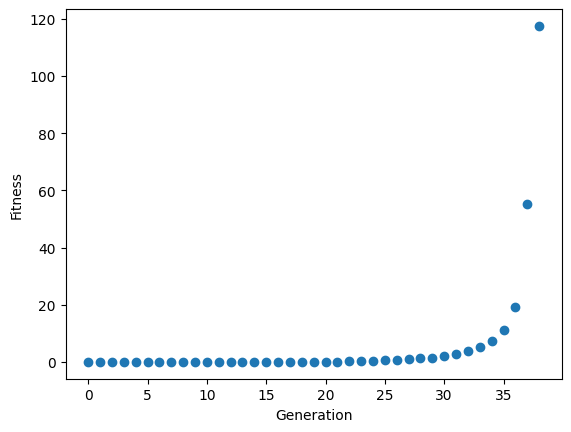

Pick a function to optimise using the genetic algorithm:
(1) Booth function
(2) Beale function
(3) Three-hump-camel function
(4) 2D Sphere function
(5) 2D Sum of different powers function
(0) Exit
Generation 0's best solution is 1.2902665079254397e-06, [316.450293401126, 95.86945184981045]
Generation 1's best solution is 5.038943368157225e-06, [98.37610801602217, 115.56512769555381]
Generation 2's best solution is 2.1829946564300825e-05, [0.4773449954901079, 99.13451843296157]
Generation 3's best solution is 3.0359993353977818e-05, [0.46683771192853907, 84.5900338887157]
Generation 4's best solution is 3.349660697092673e-05, [0.48788975010990965, 80.67973146234942]
Generation 5's best solution is 3.654486884308262e-05, [0.4775042081940864, 77.39519747849]
Generation 6's best solution is 4.031155626813944e-05, [0.5200457377423208, 73.82027172616063]
Generation 7's best solution is 4.368662507971837e-05, [0.4770876275393878, 71.0789667029818]
Generation 8's best solution is 4.84293805220

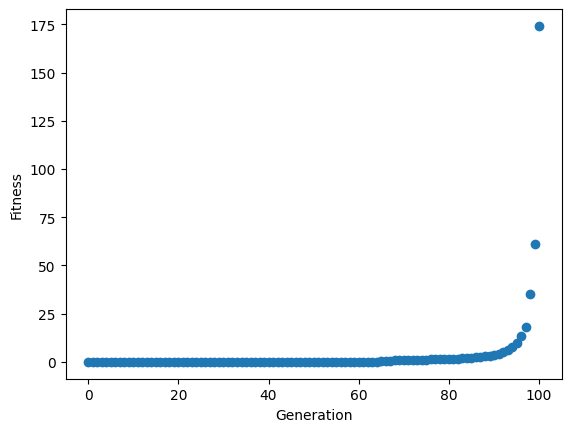

Pick a function to optimise using the genetic algorithm:
(1) Booth function
(2) Beale function
(3) Three-hump-camel function
(4) 2D Sphere function
(5) 2D Sum of different powers function
(0) Exit


In [ ]:
def main():
    # Asks the user for a function to optimise
    while True:
        os.system('cls')
        print("Pick a function to optimise using the genetic algorithm:")
        print("(1) Booth function\n(2) Beale function\n(3) Three-hump-camel function\n(4) 2D Sphere function\n(5) 2D Sum of different powers function\n(0) Exit")
        choice = input("Enter choice: ")
        if choice == "0":
            print("Exiting.....")
            break;
        elif choice == "1":
            function_to_optimize = booth_function
        elif choice == "2":
            function_to_optimize = beale_function
        elif choice == "3":
            function_to_optimize = three_hump_camel
        elif choice == "4":
            function_to_optimize = sphere_function
        elif choice == "5":
            function_to_optimize = sum_diff_powers
        else:
            print("Invalid - please enter a number from 1 to 5.")
        y = evolution(fitness_func=fitness, function=function_to_optimize, goal=100)
        # the higher the goal, the more generations are iterated through, and the more accurate the solutions will be
        x = list(range(len(y)))
        # Displays the generation # and fitness of best genome in a scatter plot.
        plt.scatter(x, y)
        plt.xlabel("Generation")
        plt.ylabel("Fitness")
        plt.show()


if __name__ == '__main__':
    main()